In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
year = 2020
month = 12
date = 23
hour = 7
minute = 24

In [3]:
# creating datetime object 
my_birthday = datetime(year, month, date)

In [4]:
my_birthday

datetime.datetime(2020, 12, 23, 0, 0)

In [5]:
# Note above by default the hour and minute are set to zero, i.e the start of the day
# now passing hour and minute as well
my_birthday = datetime(year, month, date, hour, minute)

In [6]:
my_birthday

datetime.datetime(2020, 12, 23, 7, 24)

In [7]:
# now it has various attributes like
my_birthday.year

2020

In [8]:
my_birthday.day

23

In [9]:
# Now handling dates with the numpy

np.array( ['2020-12-23', '2020-12-24', '2020-12-25'], dtype = 'datetime64' )

array(['2020-12-23', '2020-12-24', '2020-12-25'], dtype='datetime64[D]')

In [10]:
# Notice here type is datetime64[D], here D means precision is daywise, and this is by default
# Also note: this is the standard way of representing date yyyy-mm-dd

In [11]:
# by providing year wise precision, it will only take year
np.array( ['2020-12-23', '2020-12-24', '2020-12-25'], dtype = 'datetime64[Y]' )

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

- refer to official documentation for more information about codes
- https://numpy.org/doc/stable/reference/arrays.datetime.html

In [15]:
# Now creating range of dates with numpy 
# M for monthly data

# here 1 is the step, means take every month 
np.arange('2018-06-01', '2019-06-01', 1, dtype = 'datetime64[M]')

array(['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'],
      dtype='datetime64[M]')

In [17]:
# here 1 is the step, means take every week day
np.arange('2018-06-01', '2019-06-01', 1, dtype = 'datetime64[W]')

array(['2018-05-31', '2018-06-07', '2018-06-14', '2018-06-21',
       '2018-06-28', '2018-07-05', '2018-07-12', '2018-07-19',
       '2018-07-26', '2018-08-02', '2018-08-09', '2018-08-16',
       '2018-08-23', '2018-08-30', '2018-09-06', '2018-09-13',
       '2018-09-20', '2018-09-27', '2018-10-04', '2018-10-11',
       '2018-10-18', '2018-10-25', '2018-11-01', '2018-11-08',
       '2018-11-15', '2018-11-22', '2018-11-29', '2018-12-06',
       '2018-12-13', '2018-12-20', '2018-12-27', '2019-01-03',
       '2019-01-10', '2019-01-17', '2019-01-24', '2019-01-31',
       '2019-02-07', '2019-02-14', '2019-02-21', '2019-02-28',
       '2019-03-07', '2019-03-14', '2019-03-21', '2019-03-28',
       '2019-04-04', '2019-04-11', '2019-04-18', '2019-04-25',
       '2019-05-02', '2019-05-09', '2019-05-16', '2019-05-23'],
      dtype='datetime64[W]')

In [18]:
# here 7 is the step, means take every 7th day 
np.arange('2018-06-01', '2018-06-30', 7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22',
       '2018-06-29'], dtype='datetime64[D]')

In [19]:
# by default the step is 1, means take every month 
np.arange('2000-06-01', '2019-06-01', 1, dtype = 'datetime64[Y]')

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'], dtype='datetime64[Y]')

- Now handling dates with pandas

In [20]:
# periods is how many we want from the given start, and here D means daily frequency
pd.date_range('2020-01-01', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# Note few things: pandas has special DateTimeIndex object, it uses nanosecond level frequency

- See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
- for more aliases for frequency

In [22]:
# Now many a times we will not have format of dates like this, therefore inorder to provide our own format
# use to_datetime() method

pd.to_datetime(['01/01/2020', '02/01/2020', '03/01/2020'], format = '%d/%m/%Y')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [23]:
# Now handling dataframe having date as a index

data = np.random.randn(4, 2)
cols = ['A', 'B']
index = pd.date_range('2020-01-01', periods = 4, freq = 'D')

df = pd.DataFrame(data = data, columns=cols, index = index)

In [24]:
df

,A,B
2020-01-01,-0.766451,0.693640
2020-01-02,0.763876,0.126111
2020-01-03,-0.025533,-0.795439
2020-01-04,1.069735,-1.078467


In [25]:
# it is stored as DateTimeIndex object
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'], dtype='datetime64[ns]', freq='D')

In [28]:
# getting max and min of dates
df.index.max()

Timestamp('2020-01-04 00:00:00', freq='D')

In [29]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [30]:
# getting the location ( row number ) which contains the maximum date
df.index.argmax()

3

<h3>Time Resampling</h3>
<p> We can think of time resampling as groupby operation, in which we aggregate data based on some basis like
    aggregating daily or weekly or monthly data, and then performing some aggregating operation like mean, sum or 
    any complex function depending on the requirement
</p>
  

In [31]:
df = pd.read_csv('AirPassengers.csv', index_col = 'Month', parse_dates = True)

In [32]:
# Notice here Month is of DateTimeIndex type, as we passed parse_dates = True, if parse_dates = False
# pandas will treat it like normal index
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
# changing name of the column, if you want in future
df.columns = ['n_passengers']

In [34]:
df.head()

,n_passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
df.tail()

,n_passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [36]:
# now resampling the monthly data into yearly
# here A means year end frequency, check the above link for aliases
# this will aggregate the data year wise, and mean will perform mean operation for them
df.resample('A').mean()

,n_passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


In [37]:
# Here we can use various types of aggregating functions like sum, std, min, max, etc.
# We can create our own function if we want

In [38]:
# example of using custom function for resampling

def add_two_to_mean(entry):
#     if entry exists
    if len(entry):
        return entry.mean() + 2

In [39]:
df.resample(rule = 'A').apply(add_two_to_mean)

,n_passengers
Month,
1949-12-31,128.666667
1950-12-31,141.666667
1951-12-31,172.166667
1952-12-31,199.000000
1953-12-31,227.000000
1954-12-31,240.916667
1955-12-31,286.000000
1956-12-31,330.250000
1957-12-31,370.416667


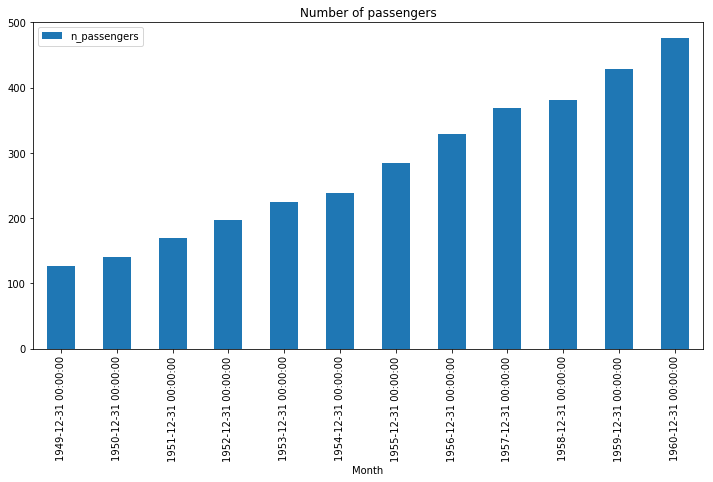

In [41]:
# after resmapling we can plot the charts with them 

title = 'Number of passengers'
df.resample(rule = 'A').mean().plot.bar(title = title, figsize = (12, 6));